## EDA

The datasheet for 2009-10 and sheet containing data for 2010-11 are both same. So we will do EDA on one of the datasheet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bkh
import plotly.express as px
from datetime import datetime

sns.set_style("whitegrid")

In [2]:
df1 = pd.read_csv("RetailPulseAssignmentData(2009-10).csv")
df2 = pd.read_csv("RetailPulseAssignmentData(2010-11).csv")

In [3]:
df1.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [5]:
df1.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [6]:
df1[['Price','Customer ID']].apply(pd.to_numeric)
df1['Quantity'].astype('int64')
df1[['Description','Country']].astype(str)
print("The datatypes of columns are changed.")

The datatypes of columns are changed.


In [7]:
df1.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [8]:
print("Does quantity have negetive values:", (df1['Quantity'].values < 0).any())

Does quantity have negetive values: True


In [9]:
neg_index = df1[df1['Quantity'].values < 0].index
df1.drop(neg_index,inplace = True)

The datasheet has **525461 transaction enteries** with records of 
- **(Invoice, StockCode, Description, Quality, InvoiceData, Price, CustomerID, Country)**

In [10]:
print("Is the datasheet with 2009-10 and 2010-11 are exactly same: ",df1.equals(df2))

Is the datasheet with 2009-10 and 2010-11 are exactly same:  False


In [11]:
print("Null values/missing values in the datasheet:-")
df1.isnull().sum()

Null values/missing values in the datasheet:-


Invoice             0
StockCode           0
Description      1101
Quantity            0
InvoiceDate         0
Price               0
Customer ID    105440
Country             0
dtype: int64

In [12]:
df1.dropna(inplace=True)  #Description and CustomerID cannot be replaced, thus those enteries are dropped
df1.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
df1 = df1.drop_duplicates()

In [14]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['Date'] = df1['InvoiceDate'].dt.strftime('%d-%m-%Y')
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Time']= df1['InvoiceDate'].dt.strftime('%H:%M:%S')

In [15]:
df1['TotalPrice'] = df1['Quantity'] * df1['Price']

In [16]:
df1.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Time,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00,100.8


## Analysing data

In [17]:
print(f"The range of dates of transactions: {df1['Date'].min()} to {df1['Date'].max()}")

The range of dates of transactions: 2009-12-01 00:00:00 to 2010-12-09 00:00:00


Above shows the range of dates of which the data is available.<br>

Now,<br>These are the **frequency of transactions** done by the same Customer and what amount sums their purchases.<br>
The top 5 Customers who have been the most loyal Customers. 

In [18]:
Freq_df = df1.groupby('Customer ID').agg({'Customer ID': lambda x: len(x),               
                                        'TotalPrice': lambda x: x.sum(),
                                         'Date': lambda x: (x.max() - x.min()).days})

Freq_df.rename(columns = {'Customer ID':'Frequency of transactions'}, inplace= True)

In [19]:
Freq_df.sort_values(by = ['Frequency of transactions'] ,ascending=False, inplace = True)
Freq_df['Customer ID'] = Freq_df.index
Freq_df['Customer ID'] = Freq_df['Customer ID'].astype(str)
Freq_df.rename(columns = {'Date':'Period of purchases'}, inplace = True)

print("The top five customer with most transaction: -")
top_five_customer_data = Freq_df.head(5)
top_five_customer_data

The top five customer with most transaction: -


,Frequency of transactions,TotalPrice,Period of purchases,Customer ID
Customer ID,,,,
14911.0,5568.0,152121.22,373,14911.0
17841.0,4944.0,29562.02,372,17841.0
14606.0,3802.0,18482.10,370,14606.0
14156.0,2646.0,196549.74,367,14156.0
12748.0,2532.0,22457.90,370,12748.0


<AxesSubplot:title={'center':'The top five customers with most transactions'}, xlabel='Frequency of transactions', ylabel='Customer ID'>

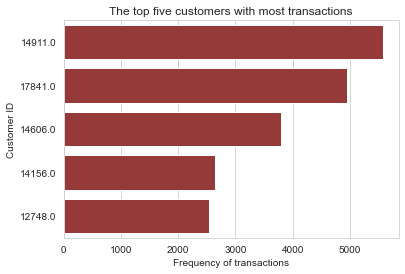

In [20]:
plt.title("The top five customers with most transactions")
sns.barplot(data = top_five_customer_data, x= 'Frequency of transactions', y = 'Customer ID', color='brown')

The loyal customers or it's value might be evaluated by repeated transactions of valuable products.<br>

We can see the **Customer ID : 14911.0** had most frequent transactions resulting of **5568** purchases. <br>
followed by these four customers :-<br>
2. ID :17841.0<br>
3. ID :14606.0<br>
4. ID :14156.0<br>
5. ID :12748.0<br>

In [21]:
# Customer Value can be evaluated as: Average Order Value * Purchase Frequency

Freq_df['avg_order_value'] = Freq_df['TotalPrice'] / Freq_df['Period of purchases']

Freq_df['profit_margin'] = Freq_df['TotalPrice'] * 0.05
Freq_df['Customer_value'] = Freq_df['avg_order_value'] * Freq_df['Frequency of transactions']
Freq_df['Customer_lifetime_value'] = Freq_df['Customer_value'] * Freq_df['profit_margin']

Freq_df.sort_values(by = 'Customer_value',ascending = False)
Freq_df.head(5)

,Frequency of transactions,TotalPrice,Period of purchases,Customer ID,avg_order_value,profit_margin,Customer_value,Customer_lifetime_value
Customer ID,,,,,,,,
14911.0,5568.0,152121.22,373,14911.0,407.831689,7606.061,2.270807e+06,1.727190e+10
17841.0,4944.0,29562.02,372,17841.0,79.467796,1478.101,3.928888e+05,5.807293e+08
14606.0,3802.0,18482.10,370,14606.0,49.951622,924.105,1.899161e+05,1.755024e+08
14156.0,2646.0,196549.74,367,14156.0,535.557875,9827.487,1.417086e+06,1.392640e+10
12748.0,2532.0,22457.90,370,12748.0,60.697027,1122.895,1.536849e+05,1.725720e+08


We can see the similar results where **Customer ID : 14911.0** had still **most valued** along with other 4 people who are<br>
in the top five customers.<br>

In [22]:
df1['month'] = pd.DatetimeIndex(df1['Date']).month

date_df = df1.groupby('Date').agg({'TotalPrice': lambda x: x.sum(),
                                  'Quantity': lambda x: x.sum()})

date_df['date'] = date_df.index
date_df['date'] = pd.to_datetime(date_df['date'])
date_df['month'] = date_df['date'].dt.month
# The months are added as column


date_price_df = date_df.sort_values(by = ['TotalPrice'], ascending = False)
print("The highest transaction amount recorded on a day : ", date_price_df['TotalPrice'][0])
date_price_df.head(4)


The highest transaction amount recorded on a day :  115172.23999999999


,TotalPrice,Quantity,date,month
Date,,,,
2010-09-27,115172.24,125369,2010-09-27,9
2010-10-14,86945.13,37130,2010-10-14,10
2010-11-04,83876.12,58902,2010-11-04,11
2010-11-10,73575.93,33426,2010-11-10,11


In [23]:
date_quantity_df = date_df.sort_values(by = ['Quantity'], ascending = False)
print("The highest units purchased on a day : ",date_price_df['Quantity'][0])
date_quantity_df.head(4)

The highest units purchased on a day :  125369


,TotalPrice,Quantity,date,month
Date,,,,
2010-09-27,115172.240,125369,2010-09-27,9
2010-08-09,31336.590,100084,2010-08-09,8
2010-02-15,42318.211,96358,2010-02-15,2
2010-03-17,29543.780,78565,2010-03-17,3


We can see that on **27-09-2010** the highest transaction both in **quantity and amount / price** was recorded globally.<br>
The quantity sold was **125369 units**, all of which summed to an inflow of **115172.240 USD** (*currency it was recorded*).

<AxesSubplot:xlabel='month', ylabel='TotalPrice'>

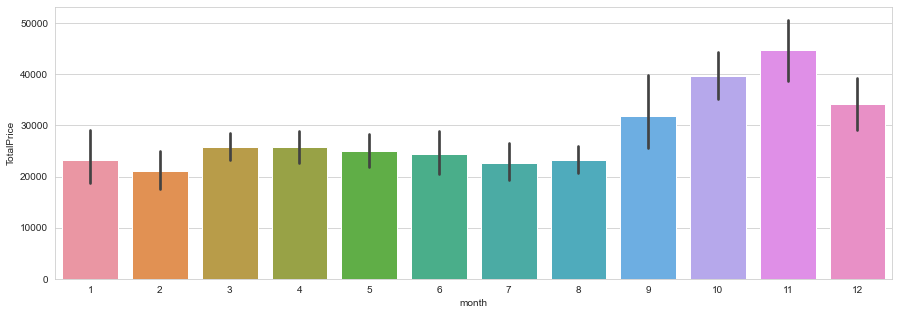

In [24]:
plt.figure(figsize = (15,5))

date_df.sort_values(by = 'month', ascending = True, inplace = True)
sns.barplot(data = date_df, x = 'month', y = 'TotalPrice')

Most revenue generated with transactions were made in month of **November** followed by Octobe and December. Thus this likely indicates the most inflow occurs in winter season which is the end of the year. 

<AxesSubplot:xlabel='Country', ylabel='Customer ID'>

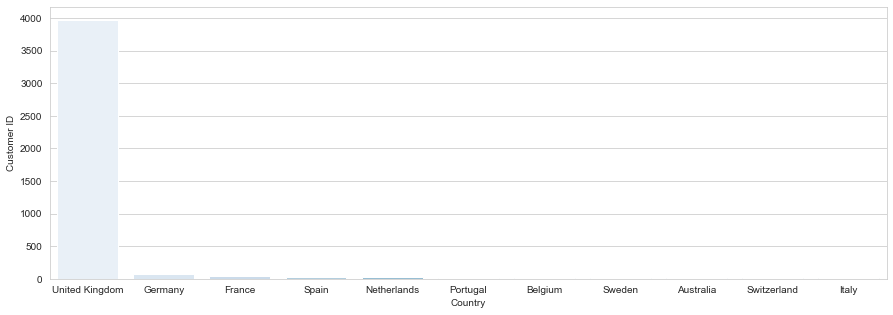

In [25]:
plt.figure(figsize = (15,5))
Customer_Country = df1.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False).reset_index().head(11)
sns.barplot(data=Customer_Country,x='Country',y='Customer ID',palette='Blues')

Almost all the Customers are residing in *United Kindom*.

In [26]:
df1['Description'].unique()

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'BAKING MOULD ROSE MILK CHOCOLATE',
       'BAKING MOULD CHOCOLATE CUP CAKES',
       'BAKING MOULD EASTER EGG MILK CHOC'], dtype=object)

In [27]:
len(df1['Description'].unique())

4444

In [28]:
Desc_df = df1.groupby('Description').agg({'Customer ID': lambda x: len(x),
                                          'TotalPrice': lambda x: x.sum(),
                                          'Quantity': lambda x: x.sum()})

Desc_df_ID = Desc_df.sort_values(by = 'Customer ID', ascending = False)
Desc_df_price = Desc_df.sort_values(by = 'TotalPrice', ascending = False)
Desc_df_Quantity = Desc_df.sort_values(by = 'Quantity',ascending = False)

In [29]:
Desc_df_ID.head(5)

,Customer ID,TotalPrice,Quantity
Description,,,
WHITE HANGING HEART T-LIGHT HOLDER,3107.0,151339.16,56814
REGENCY CAKESTAND 3 TIER,1696.0,143727.60,12489
STRAWBERRY CERAMIC TRINKET BOX,1372.0,29694.86,25330
ASSORTED COLOUR BIRD ORNAMENT,1355.0,70291.03,44431
HOME BUILDING BLOCK WORD,1192.0,28028.30,4784


We can see that **"WHITE HANGING HEART T-LIGHT HOLDER"** is the best seller followed by other items in above dataframe.

There were **4444 different items/products** that were purchased. So people prefering to buy same things can be assumed as a category of people prefering that item. The most prefered product was WHITE HANGING HEART T-LIGHT HOLDER with over 56814 units sold contributing in **56814 USD** of inflow.<br>



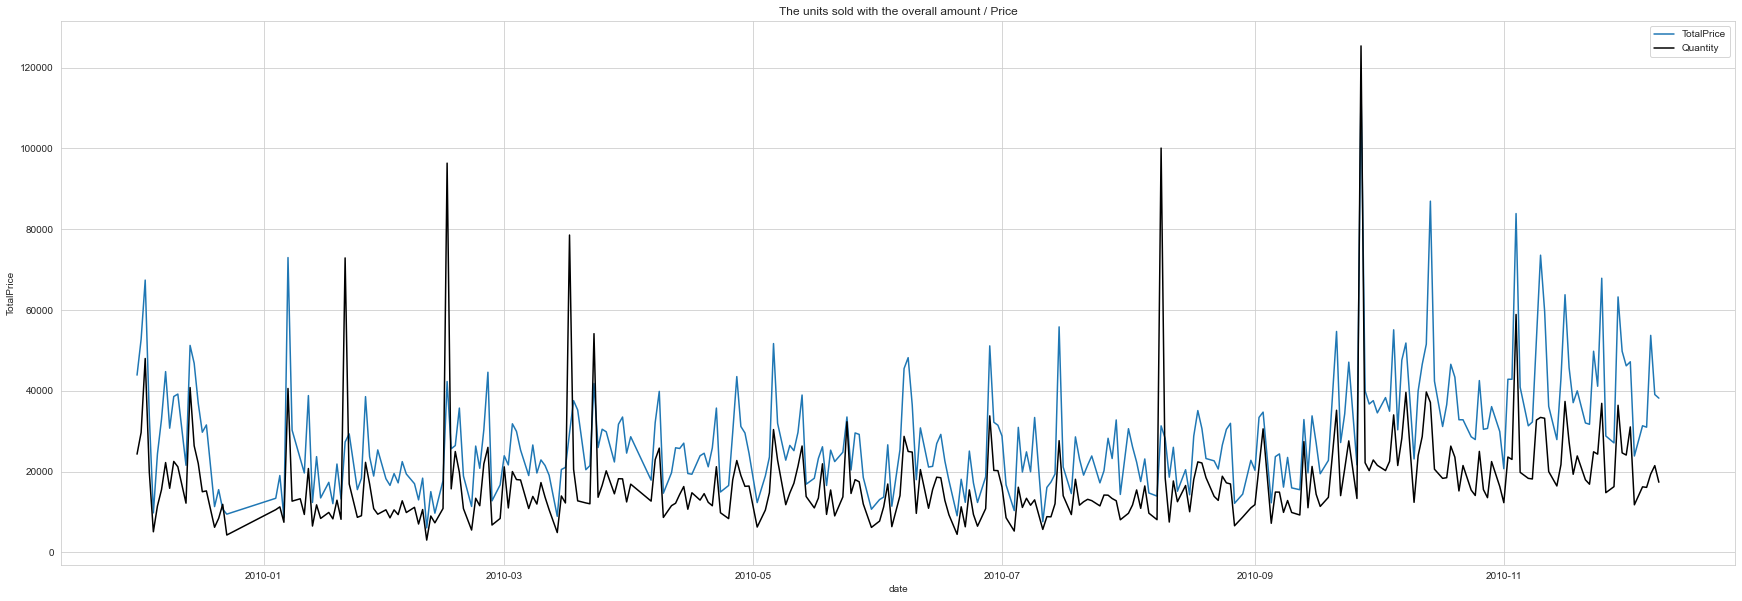

In [30]:
plt.figure(figsize = (30,10))
plt.title("The units sold with the overall amount / Price")


sns.lineplot(x = date_df['date'], y = date_df['TotalPrice'])
sns.lineplot(x = date_df['date'], y = date_df['Quantity'], color = 'black')
plt.legend(['TotalPrice','Quantity'])

Here we can see the most of **units were sold around october and november** and most inflow was around the same time.<br>
With more data seasonality could have been detected confirming if there is some periodic pattern of purchase but with this data we can't confirm the same. 